In [1]:
import pandas as pd
from ast import literal_eval

## load and prepare result of FPgroth algorithm 

In [2]:
# load rules csv in columns with list format
df=pd.read_csv("data/rules_0.0001_0.001.csv", converters={'antecedent': literal_eval,'consequent': literal_eval})
df.head(3)

,antecedent,consequent,confidence,lift,support
0,[739590033],[860949003],0.876498,6470.533310,0.000105
1,[590928001],[688537004],0.213753,131.632335,0.000306
2,[590928001],[712924012],0.130234,357.050472,0.000187


In [3]:
# convert strings of articles to integer(article id)
df["antecedent"] = df["antecedent"].apply(lambda x: list(map(int,x)))
df["consequent"] = df["consequent"].apply(lambda x: list(map(int,x)))

## load article csv and create dictionary of article ids and names of products  

In [4]:
# load articles
dfa=pd.read_csv('data/articles.csv')

In [5]:
# generate dictionary key: article_id, value: product_name
dfa_dict=dict(zip(dfa.article_id,dfa.prod_name))

## select the articles that are bought together more often 

In [6]:
# select the products that are bought together with high confidence
confidence = 0.85
df_most=df[df['confidence']>=confidence].sort_values(by=['confidence'],ascending=False)
df_most.head()

,antecedent,consequent,confidence,lift,support
512,[810419006],[800389007],0.925075,7574.252397,0.000102
162,[823165002],[823118002],0.916078,3985.697098,0.000114
271,[799410003],[799409003],0.910387,4512.268889,0.000148
446,[712924008],[590928019],0.910326,2380.738427,0.000295
110,[739590022],[559616017],0.908894,2448.210493,0.000138


In [7]:
# create lists of associated products
itemsets_most=[]
for i,j in zip(list(df_most["antecedent"]),list(df_most["consequent"])):
    itemsets_most.append(i+j)

In [8]:
# convert article ids to names of products
names_most=[]
for item in itemsets_most:
    names_most.append([dfa_dict[x] for x in item])

In [9]:
# list of products (list of lists) 
names_most

[['Timeless Tanga', 'Timeless High Apex Tri Top'],
 ['Ginger Highwaist', 'Ginger Top'],
 ['Kanye Vest Mid Brief', 'Kanye Vest Top'],
 ['New Girl Wide Side Tanga', 'New Girl Push Top'],
 ['Timeless Cheeky Brief', 'Timeless Push Triangle(1)'],
 ['Sweet & Bitter Mid Tie Brief', 'Sweet and Bitter Top'],
 ['New Girl Cheeky Tanga', 'New Girl Push Top'],
 ['Timeless Midrise Brief', 'New Girl Push Top'],
 ['C Antibes Tie Tanga', 'C Antibes Triangle'],
 ['Timeless Cheeky Brief', 'Tiger Bandeau'],
 ['Pick Up High Rise Brief', 'Pick Up Top'],
 ['This Is Sally Tie Tanga', 'This is Sally Push Up Bra'],
 ['Tulum Tie Brief', 'Tulum Triangle Top'],
 ['Pretty Please Cheeky Tanga', 'Pretty Please Triangle Top'],
 ['Timeless Cheeky Brief', 'Tiger Bandeau'],
 ['Simple as that Cheeky Tanga', 'Simple as That Triangle Top'],
 ['Hubba Bubba V shape brief', 'Hubba Bubba push triangle'],
 ['Timeless Tie Tanga', 'Timeless Push Triangle(1)'],
 ['New Girl Wide Side Tanga', 'New Girl Push Top'],
 ['Topekachu Tanga'

## select the articles that are bought together less often

In [10]:
# select the products that are bought together with low confidence
df_least=df[df['confidence']< 0.1].sort_values(by=['confidence'])
df_least.head()

,antecedent,consequent,confidence,lift,support
485,[706016001],[554450001],0.025340,17.870156,0.000118
480,[706016001],[706016019],0.025601,45.456790,0.000119
294,[610776002],[610776028],0.045726,73.629682,0.000126
130,[673677002],[673677004],0.050734,74.748216,0.000100
483,[706016001],[706016006],0.052271,40.912604,0.000243


In [11]:
# create lists of less associated products
itemsets_least=[]
for i,j in zip(list(df_least["antecedent"]),list(df_least["consequent"])):
    itemsets_least.append(i+j)

In [12]:
# convert article ids to names of products
names_least=[]
for item in itemsets_least:
    names_least.append([dfa_dict[x] for x in item])

In [13]:
# some of names are the same. The reason is that some products with the same name have different article ids.
# For instance, as you can see in the next cell two articles have the same name and different colors.
names_least

[['Jade HW Skinny Denim TRS', 'Julia RW Skinny Denim TRS'],
 ['Jade HW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Tilly (1)', 'Tilly (1)'],
 ['Henry polo. (1)', 'Henry polo (1)'],
 ['Jade HW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Tilda tank', 'Tilda tank'],
 ['Tilda tank', 'Tilda tank'],
 ['Skinny Ankle R.W Brooklyn', 'Skinny Ankle R.W Brooklyn'],
 ['Curvy Jeggings HW Ankle', 'Jeggings H.W'],
 ['Jade HW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Jade HW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Simple as that Cheeky Tanga', 'Simple as that Cheeky Tanga'],
 ['Perrie Slim Mom Denim TRS', 'Perrie Slim Mom Denim TRS'],
 ['Jade HW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Skinny Ankle R.W Brooklyn', 'Skinny Ankle R.W Brooklyn'],
 ['Luna skinny RW', 'Luna skinny RW'],
 ['Luna skinny RW', 'Luna skinny RW'],
 ['Tilda tank', 'Tilda tank'],
 ['Luna skinny RW', 'Luna skinny RW'],
 ['Jade HW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Kanta slac

In [14]:
# some articles have same name and different ids
dfa[(dfa['article_id']==706016001) | (dfa['article_id']==706016019)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
53892,706016001,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,9,Black,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...
53904,706016019,706016,Jade HW Skinny Denim TRS,272,Trousers,Garment Lower body,1010016,Solid,73,Dark Blue,...,Trousers,D,Divided,2,Divided,53,Divided Collection,1009,Trousers,High-waisted jeans in washed superstretch deni...


In [15]:
# I thinks we should not cosider the same products as a result
# Here is the final result
names_least_unique = [item for item in names_least if (item[0]!=item[1])]
names_least_unique

[['Jade HW Skinny Denim TRS', 'Julia RW Skinny Denim TRS'],
 ['Henry polo. (1)', 'Henry polo (1)'],
 ['Curvy Jeggings HW Ankle', 'Jeggings H.W'],
 ['Timeless Midrise Brief', 'Timeless Push Bra'],
 ['Timeless Midrise Brief', 'Shake it in Balconette'],
 ['Julia RW Skinny Denim TRS', 'Jade HW Skinny Denim TRS'],
 ['Highwaist 30 den 1p Tights', 'Control Top 30 den 1p Tights'],
 ['Lazer Razer Brief', 'Lazer Razer Top']]

## show an example of two items are often being sold together

In [16]:
df=pd.read_csv('data/transactions_train.csv')

In [17]:
df=df[['t_dat','customer_id','article_id']]
df=df.drop_duplicates(['t_dat','customer_id','article_id'])

In [20]:
df_ = df[(df['article_id']==810419006) | (df['article_id']==800389007)][['t_dat','article_id']]
df_['t_dat']= pd.to_datetime(df_['t_dat'], format='%Y-%m-%d')
df_c=df_.groupby(['article_id','t_dat'])['article_id'].count().reset_index(name='count').set_index('t_dat')

<AxesSubplot:title={'center':'number of items have been sold in a month'}, xlabel='t_dat'>

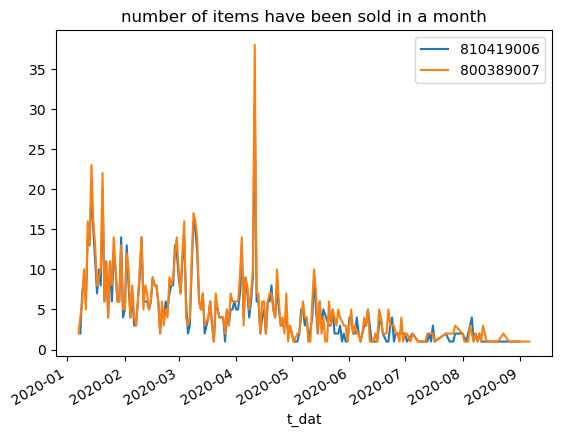

In [22]:
# plot the shopping pattern for the items in shopping baskets
df_c[df_c['article_id']==810419006]['count'].plot(label='Timeless Tanga',legend=True,title='number of items have been sold in a month')
df_c[df_c['article_id']==800389007]['count'].plot(label='800389007',legend=True)